### 5.Dane tekstowe i API


#### Proste operacje tekstowe

In [1]:
text = 'Python'

In [2]:
print(dir(text))

['__add__', '__class__', '__contains__', '__delattr__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__getnewargs__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__iter__', '__le__', '__len__', '__lt__', '__mod__', '__mul__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__rmod__', '__rmul__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', 'capitalize', 'casefold', 'center', 'count', 'encode', 'endswith', 'expandtabs', 'find', 'format', 'format_map', 'index', 'isalnum', 'isalpha', 'isascii', 'isdecimal', 'isdigit', 'isidentifier', 'islower', 'isnumeric', 'isprintable', 'isspace', 'istitle', 'isupper', 'join', 'ljust', 'lower', 'lstrip', 'maketrans', 'partition', 'removeprefix', 'removesuffix', 'replace', 'rfind', 'rindex', 'rjust', 'rpartition', 'rsplit', 'rstrip', 'split', 'splitlines', 'startswith', 'strip', 'swapcase', 'title', 'translate', 'upper', 'zfill']


In [3]:
uppercase = text.upper()
lowercase = text.lower()
stripped = text.strip()
replaced = text.replace('P', 'C')
 
print('Original text:', text)
print('Uppercase text:', uppercase)
print('Lowercase text:', lowercase)
print('Stripped text:', stripped)
print('Replaced text:', replaced)

Original text: Python
Uppercase text: PYTHON
Lowercase text: python
Stripped text: Python
Replaced text: Cython


In [4]:
napis="python"
print(napis.title())

Python


In [5]:
text = 'Python '
text.strip() # usuwa białe znaki

'Python'

In [6]:
text.upper()

'PYTHON '

In [7]:
text.lower()

'python '

In [8]:
napis="1,3"
print(napis.replace(",","."))

1.3


In [9]:
napis="python"
print(len(napis))

6


In [10]:
napis="Python"
print(napis.count('P'))

1


In [11]:
number_string = '123,785,45,5'
numbers = number_string.split(',')
print(numbers)

['123', '785', '45', '5']


In [12]:
telefon = '744-444-444'
telefon.replace('-', '')

'744444444'

In [17]:
telefon = '744-444-444'
telefon = telefon.split('-')
telefon = '-'.join(telefon)
telefon

'744-444-444'

In [18]:
words = ['sport', 'python', 'free', 'time']
joined_words = '#'.join(words)
print(joined_words)

sport#python#free#time


#### Łańcuchy funkcji - wywoływanie ich kaskadowo

In [19]:
napis="prog.py"
print(napis.upper().split("."))

['PROG', 'PY']


In [20]:
nazwa="Python"
for n in nazwa:
    print(n)

P
y
t
h
o
n


#### O cięciu łańcuchów tekstowych słów kilka

In [21]:
lancuch="123456789"

In [22]:
print(lancuch[2])

3


In [23]:
print(lancuch[-2])

8


In [24]:
print(lancuch[2:5])

345


In [ ]:
print(lancuch[:5])

In [ ]:
print(lancuch[:-3])

In [ ]:
print(lancuch[0:6:2])

In [ ]:
print(lancuch[0:len(lancuch):2])

In [ ]:
print(lancuch[::2])

#### Dygresja na temat dat

In [25]:
import pandas as pd

In [26]:
data1 = '2024-01-01-14:00:00'
data2 = '2024-01-01-14:01:00'

In [27]:
data1 = pd.to_datetime(data1)
data2 = pd.to_datetime(data2)

In [28]:
data2

Timestamp('2024-01-01 14:01:00')

In [ ]:
data2 - pd.Timedelta(seconds=60)

In [29]:
data2.ceil('h')

Timestamp('2024-01-01 15:00:00')

In [30]:
data2.floor('h')

Timestamp('2024-01-01 14:00:00')

In [32]:
data2 - data1

Timedelta('0 days 00:01:00')

In [31]:
data1 == data2.floor('h')

True

### Łączenie z API i pobieranie danych

### Łączenie z API i pobieranie danych

Łączenie się z API (Application Programming Interface) i pobieranie danych to element analizy danych, który pozwala na dostęp do dynamicznych i często aktualizowanych źródeł informacji. API umożliwiają programistom komunikację z różnymi usługami internetowymi, takimi jak serwisy pogodowe, platformy społecznościowe czy bazy danych finansowych.

#### Podstawy łączenia się z API

API zazwyczaj działają na zasadzie wysyłania żądań HTTP i otrzymywania odpowiedzi, zazwyczaj w formacie JSON lub XML. W Pythonie najpopularniejszą biblioteką do wysyłania żądań HTTP jest `requests`.



### Podsumowanie

Łączenie się z API i pobieranie danych jest fundamentalnym aspektem analizy danych, pozwalającym na dostęp do dynamicznych i aktualizowanych źródeł informacji. Korzystanie z biblioteki `requests` w Pythonie umożliwia łatwe wysyłanie zapytań HTTP GET i POST, zarówno do publicznych API, jak i tych wymagających autoryzacji. Dzięki temu można pobierać, przetwarzać i analizować dane z różnorodnych źródeł, co jest kluczowe dla nowoczesnych aplikacji analitycznych i naukowych.

In [33]:
import pandas as pd

### https://api.nbp.pl/

In [41]:
a = pd.read_json('http://api.nbp.pl/api/exchangerates/rates/a/USD/')
a

,table,currency,code,rates
0,A,dolar amerykański,USD,"{'no': '244/A/NBP/2025', 'effectiveDate': '202..."


In [42]:
pd.DataFrame(a['rates']).values[0][0]['mid']

3.5976

In [43]:
a = pd.read_json('http://api.nbp.pl/api/exchangerates/rates/a/USD/2024-03-15//')
a

,table,currency,code,rates
0,A,dolar amerykański,USD,"{'no': '054/A/NBP/2024', 'effectiveDate': '202..."


In [ ]:
# a = pd.read_json('http://api.nbp.pl/api/exchangerates/rates/a/USD/today/')
# a

In [44]:
pd.DataFrame(a['rates']).values

array([[{'no': '054/A/NBP/2024', 'effectiveDate': '2024-03-15', 'mid': 3.9392}]],
      dtype=object)

In [45]:
cena_realna_dzis = pd.read_json('http://api.nbp.pl/api/exchangerates/rates/a/USD/')
for i, zap1 in enumerate(cena_realna_dzis['rates']):
    wartosc_kursu_dzis = zap1['mid']

In [46]:
wartosc_kursu_dzis

3.5976

In [47]:
cena_złota_dzis = pd.read_json('http://api.nbp.pl/api/cenyzlota/')
cena_złota_dzis.cena

0    494.43
Name: cena, dtype: float64

In [50]:
waluta = 'USD'
start = '2025-01-01'
end = '2025-03-01'

In [51]:
query = 'http://api.nbp.pl/api/exchangerates/rates/a/' + waluta +'/' + start + '/' + end + '/'
zapytanie = pd.read_json(query)
zapytanie

,table,currency,code,rates
0,A,dolar amerykański,USD,"{'no': '001/A/NBP/2025', 'effectiveDate': '202..."
1,A,dolar amerykański,USD,"{'no': '002/A/NBP/2025', 'effectiveDate': '202..."
2,A,dolar amerykański,USD,"{'no': '003/A/NBP/2025', 'effectiveDate': '202..."
3,A,dolar amerykański,USD,"{'no': '004/A/NBP/2025', 'effectiveDate': '202..."
4,A,dolar amerykański,USD,"{'no': '005/A/NBP/2025', 'effectiveDate': '202..."
5,A,dolar amerykański,USD,"{'no': '006/A/NBP/2025', 'effectiveDate': '202..."
6,A,dolar amerykański,USD,"{'no': '007/A/NBP/2025', 'effectiveDate': '202..."
7,A,dolar amerykański,USD,"{'no': '008/A/NBP/2025', 'effectiveDate': '202..."
8,A,dolar amerykański,USD,"{'no': '009/A/NBP/2025', 'effectiveDate': '202..."
9,A,dolar amerykański,USD,"{'no': '010/A/NBP/2025', 'effectiveDate': '202..."


In [52]:
k = zapytanie['rates'].values
k

array([{'no': '001/A/NBP/2025', 'effectiveDate': '2025-01-02', 'mid': 4.1219},
       {'no': '002/A/NBP/2025', 'effectiveDate': '2025-01-03', 'mid': 4.1512},
       {'no': '003/A/NBP/2025', 'effectiveDate': '2025-01-07', 'mid': 4.077},
       {'no': '004/A/NBP/2025', 'effectiveDate': '2025-01-08', 'mid': 4.1335},
       {'no': '005/A/NBP/2025', 'effectiveDate': '2025-01-09', 'mid': 4.1523},
       {'no': '006/A/NBP/2025', 'effectiveDate': '2025-01-10', 'mid': 4.1415},
       {'no': '007/A/NBP/2025', 'effectiveDate': '2025-01-13', 'mid': 4.1904},
       {'no': '008/A/NBP/2025', 'effectiveDate': '2025-01-14', 'mid': 4.1658},
       {'no': '009/A/NBP/2025', 'effectiveDate': '2025-01-15', 'mid': 4.133},
       {'no': '010/A/NBP/2025', 'effectiveDate': '2025-01-16', 'mid': 4.1433},
       {'no': '011/A/NBP/2025', 'effectiveDate': '2025-01-17', 'mid': 4.1462},
       {'no': '012/A/NBP/2025', 'effectiveDate': '2025-01-20', 'mid': 4.1321},
       {'no': '013/A/NBP/2025', 'effectiveDate': '2025

In [53]:
l = []
data = []
for i, zap1 in enumerate(zapytanie['rates']):
    l.append(zap1['mid'])
    data.append(zap1['effectiveDate'])



In [55]:
test = pd.DataFrame(l, data).reset_index()
test.columns = ['data', 'cena']
test

,data,cena
0,2025-01-02,4.1219
1,2025-01-03,4.1512
2,2025-01-07,4.0770
3,2025-01-08,4.1335
4,2025-01-09,4.1523
5,2025-01-10,4.1415
6,2025-01-13,4.1904
7,2025-01-14,4.1658
8,2025-01-15,4.1330
9,2025-01-16,4.1433


Bad value in file PosixPath('/Users/tomasz/.matplotlib/stylelib/company.mplstyle'), line 3 ("axes.prop_cycle: cycler('color', ['#123D98', '#C21E3C', '#E2A713', '#00AEEF', '#7F3F98'])"): Key axes.prop_cycle: "cycler('color', ['" is not a valid cycler construction: unterminated string literal (detected at line 1) (<unknown>, line 1)
Bad value in file PosixPath('/Users/tomasz/.matplotlib/stylelib/company.mplstyle'), line 6 ('grid.color: #e0e0e0'): Key grid.color: '' does not look like a color arg


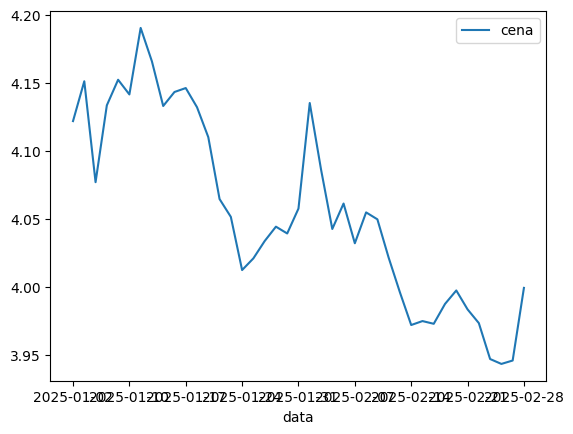

In [56]:
test.set_index('data').plot();

### requests

In [58]:
!pip install requests

In [57]:
import requests

In [59]:
BASE_URL = "https://api.nbp.pl/api/exchangerates/tables/a/?format=json"
OBSLUGIWANE_WALUTY = ("EUR", "CHF", "USD", "IDR")


res = requests.get(BASE_URL)

if res.status_code != 200:
    print(f"Problem z usługą {BASE_URL}")
    exit()

cala_odpowiedz = res.json()
tabela_kursow = cala_odpowiedz[0]["rates"]

for el in tabela_kursow:
    if el["code"] in OBSLUGIWANE_WALUTY:
        print(f'Aktualny kurs {el["currency"]} ({el["code"]}) = {el["mid"]}')

Aktualny kurs dolar amerykański (USD) = 3.5976
Aktualny kurs euro (EUR) = 4.2149
Aktualny kurs frank szwajcarski (CHF) = 4.5086
Aktualny kurs rupia indonezyjska (IDR) = 0.00021562


In [60]:
import streamlit as st
import requests
import pandas as pd
import plotly.express as px
from datetime import datetime, timedelta

# Konfiguracja strony
st.set_page_config(page_title="Kursy Walut NBP", page_icon="💱", layout="wide")

# Tytuł aplikacji
st.title("💱 Kursy Walut NBP")
st.markdown("Aplikacja pobierająca dane z API Narodowego Banku Polskiego")

# Sidebar z opcjami
st.sidebar.header("Ustawienia")

# Lista popularnych walut
waluty = {
    "USD": "Dolar amerykański",
    "EUR": "Euro",
    "GBP": "Funt szterling",
    "CHF": "Frank szwajcarski",
    "JPY": "Jen japoński",
    "CZK": "Korona czeska",
    "SEK": "Korona szwedzka",
    "NOK": "Korona norweska"
}

# Wybór waluty
wybrana_waluta = st.sidebar.selectbox(
    "Wybierz walutę:",
    options=list(waluty.keys()),
    format_func=lambda x: f"{x} - {waluty[x]}"
)

# Wybór liczby dni historycznych
dni = st.sidebar.slider("Liczba dni historii:", min_value=7, max_value=90, value=30)

# Wybór typu tabeli
typ_tabeli = st.sidebar.radio("Typ tabeli NBP:", ["A", "B", "C"])

# Funkcja pobierająca aktualny kurs
@st.cache_data(ttl=3600)
def pobierz_aktualny_kurs(waluta, tabela):
    url = f"https://api.nbp.pl/api/exchangerates/rates/{tabela}/{waluta}/?format=json"
    try:
        response = requests.get(url)
        if response.status_code == 200:
            return response.json()
        else:
            return None
    except Exception as e:
        st.error(f"Błąd połączenia: {e}")
        return None

# Funkcja pobierająca dane historyczne
@st.cache_data(ttl=3600)
def pobierz_dane_historyczne(waluta, tabela, liczba_dni):
    url = f"https://api.nbp.pl/api/exchangerates/rates/{tabela}/{waluta}/last/{liczba_dni}/?format=json"
    try:
        response = requests.get(url)
        if response.status_code == 200:
            return response.json()
        else:
            return None
    except Exception as e:
        st.error(f"Błąd połączenia: {e}")
        return None

# Główna sekcja - aktualny kurs
col1, col2 = st.columns([1, 2])

with col1:
    st.subheader("📊 Aktualny kurs")
    dane_aktualne = pobierz_aktualny_kurs(wybrana_waluta, typ_tabeli.lower())
    
    if dane_aktualne:
        kurs = dane_aktualne['rates'][0]['mid']
        data = dane_aktualne['rates'][0]['effectiveDate']
        
        st.metric(
            label=f"{wybrana_waluta} - {waluty[wybrana_waluta]}",
            value=f"{kurs:.4f} PLN"
        )
        st.info(f"Data: {data}")
        st.caption(f"Tabela: {typ_tabeli}")

with col2:
    st.subheader("📈 Wykres historyczny")
    dane_historyczne = pobierz_dane_historyczne(wybrana_waluta, typ_tabeli.lower(), dni)
    
    if dane_historyczne:
        # Przygotowanie danych do wykresu
        df = pd.DataFrame(dane_historyczne['rates'])
        df['effectiveDate'] = pd.to_datetime(df['effectiveDate'])
        
        # Wykres liniowy
        fig = px.line(
            df,
            x='effectiveDate',
            y='mid',
            title=f"Kurs {wybrana_waluta}/PLN - ostatnie {dni} dni",
            labels={'effectiveDate': 'Data', 'mid': 'Kurs (PLN)'},
            markers=True
        )
        
        fig.update_layout(
            hovermode='x unified',
            xaxis_title="Data",
            yaxis_title="Kurs (PLN)",
            height=400
        )
        
        st.plotly_chart(fig, use_container_width=True)
        
        # Statystyki
        st.subheader("📉 Statystyki")
        col3, col4, col5, col6 = st.columns(4)
        
        with col3:
            st.metric("Minimum", f"{df['mid'].min():.4f} PLN")
        with col4:
            st.metric("Maximum", f"{df['mid'].max():.4f} PLN")
        with col5:
            st.metric("Średnia", f"{df['mid'].mean():.4f} PLN")
        with col6:
            zmiana = ((df['mid'].iloc[-1] - df['mid'].iloc[0]) / df['mid'].iloc[0] * 100)
            st.metric("Zmiana", f"{zmiana:.2f}%")
        
        # Tabela danych
        with st.expander("🗂️ Zobacz dane tabelaryczne"):
            df_display = df[['effectiveDate', 'mid']].copy()
            df_display.columns = ['Data', 'Kurs (PLN)']
            df_display = df_display.sort_values('Data', ascending=False)
            st.dataframe(df_display, use_container_width=True)

# Stopka
st.markdown("---")
st.markdown("**Źródło danych:** [API NBP](https://api.nbp.pl) | Dane aktualizowane codziennie przez NBP")


2025-12-17 13:54:50.585 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-17 13:54:50.586 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-17 13:54:50.628 
  command:

    streamlit run /Users/tomasz/Desktop/ML_DL_Python_Comarch/.venv/lib/python3.13/site-packages/ipykernel_launcher.py [ARGUMENTS]
2025-12-17 13:54:50.629 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-17 13:54:50.629 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-17 13:54:50.629 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-17 13:54:50.629 Thread 'MainThread': missing ScriptRunContext! Th

DeltaGenerator()